In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import pandas as pd
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import pairwise_kernels,rbf_kernel,polynomial_kernel
from sklearn.metrics import f1_score,accuracy_score

# <center>Load data</center>

In [3]:
lc_train_data = pd.read_csv('exercise-02/q1_leastSquare_linear_classifier_python/lc_train_data.dat', sep=" ", header=None)
lc_train_label = pd.read_csv('exercise-02/q1_leastSquare_linear_classifier_python/lc_train_label.dat', header=None)
lc_test_data = pd.read_csv('exercise-02/q1_leastSquare_linear_classifier_python/lc_test_data.dat', sep=" ", header=None)
lc_test_label = pd.read_csv('exercise-02/q1_leastSquare_linear_classifier_python/lc_test_label.dat', header=None)

lc_train_data = np.array(lc_train_data)
lc_test_data = np.array(lc_test_data)
lc_train_label = np.array(lc_train_label)
lc_test_label = np.array(lc_test_label)

# <center>Linear SVM</center>

In [4]:
def svmlin(X, t, C):

    H = pairwise_kernels(X,metric='linear')
    multiplier = np.matmul(t,t.transpose())
    H = np.multiply(H,multiplier)
    P = cvxopt_matrix(H)
    
    q = cvxopt_matrix((-1)* np.ones(X.shape[0]))
    G = cvxopt_matrix(np.vstack((-np.eye(H.shape[0]), np.eye(H.shape[0]))))
    ub = np.ones((H.shape[0])) * C
    lb = np.zeros((H.shape[0]))
    h = cvxopt_matrix(np.hstack([lb,ub]))
    A = t.reshape(1, -1)
    A = cvxopt_matrix(A, (1, A.shape[1]), 'd')
    b = cvxopt_matrix(np.zeros(1))
    
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    
    a = np.array(sol['x'])
    sv = X[a.flatten()>1e-3,:]
    w = np.matmul((t * a).transpose(),X)
    print(w.shape)
    print(X.shape)
    count = sv.shape[0]
    b = np.sum(t[a.flatten()>1e-3,:] - np.matmul(sv,w.transpose()))
    b /= count
    
    classification = np.matmul(X, w.transpose()) +b

    for i in range(X.shape[0]):
        if(classification[i]>0):
            classification[i] = 1
        elif(classification[i]<0):
            classification[i] = -1
            
    return a,sv,w,b,classification

 # <center>NonLinear SVM Using polynomial Kernenl</center>

In [5]:
def svmnonlin_pol(X, t, C,p):

    H = polynomial_kernel(X,degree=p)
    multiplier = np.matmul(t,t.transpose())
    H = np.multiply(H,multiplier)
    P = cvxopt_matrix(H)
    
    q = cvxopt_matrix((-1)* np.ones(X.shape[0]))
    G = cvxopt_matrix(np.vstack((-np.eye(H.shape[0]), np.eye(H.shape[0]))))
    ub = np.ones((H.shape[0])) * C
    lb = np.zeros((H.shape[0]))
    h = cvxopt_matrix(np.hstack([lb,ub]))
    A = t.reshape(1, -1)
    A = cvxopt_matrix(A, (1, A.shape[1]), 'd')
    b = cvxopt_matrix(np.zeros(1))
    
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    a = np.array(sol['x'])
    sv = X[a.flatten()>1e-3,:]
    w = np.matmul((t * a).transpose(),X)
    count = sv.shape[0]
    b = np.sum(t[a.flatten()>1e-3,:] - np.matmul(sv,w.transpose()))
    b /= count
    
    classification = np.matmul((t*a).transpose(),polynomial_kernel(X,degree=p))+b
    classification = classification.transpose()
    print(classification.shape)
    for i in range(X.shape[0]):
        if(classification[i]>0):
            classification[i] = 1
        elif(classification[i]<0):
            classification[i] = -1
            
    return a,sv,w,b,classification

# <center>NonLinear SVM using Gaussian Kernel(Radial basis function)</center> 

In [6]:
def svmnonlin_gaussian(X, t, C, var):

    H = rbf_kernel(X,gamma=var)
    multiplier = np.matmul(t,t.transpose())
    H = np.multiply(H,multiplier)
    P = cvxopt_matrix(H)
    
    q = cvxopt_matrix((-1)* np.ones(X.shape[0]))
    G = cvxopt_matrix(np.vstack((-np.eye(H.shape[0]), np.eye(H.shape[0]))))
    ub = np.ones((H.shape[0])) * C
    lb = np.zeros((H.shape[0]))
    h = cvxopt_matrix(np.hstack([lb,ub]))
    A = t.reshape(1, -1)
    A = cvxopt_matrix(A, (1, A.shape[1]), 'd')
    b = cvxopt_matrix(np.zeros(1))
    
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    
    a = np.array(sol['x'])
    sv = X[a.flatten()>1e-3,:]
    w = np.matmul((t * a).transpose(),X)
    count = sv.shape[0]
    b = np.sum(t[a.flatten()>1e-3,:] - np.matmul(sv,w.transpose()))
    b /= count
    classification =  np.mutmul((t*a).transpose(),rbf_kernel(X,gamma=var)) +b
    classification = classification.transpose()
    for i in range(X.shape[0]):
        if(classification[i]>0):
            classification[i] = 1
        elif(classification[i]<0):
            classification[i] = -1
            
    return a,sv,w,b,classification

#  <center>Training given data using polynomial Kernel</center>

     pcost       dcost       gap    pres   dres
 0:  1.7042e+04 -1.3052e+05  1e+05  2e-13  4e-14
 1:  5.4309e+03 -1.0003e+04  2e+04  1e-13  3e-14
 2:  7.8331e+02 -1.4964e+03  2e+03  4e-14  2e-14
 3:  5.5264e+01 -2.4480e+02  3e+02  6e-14  1e-14
 4: -1.6617e+01 -1.3603e+02  1e+02  9e-15  5e-15
 5: -8.2259e+01 -1.6792e+02  9e+01  3e-14  6e-15
 6: -8.9984e+01 -1.3922e+02  5e+01  1e-14  7e-15
 7: -1.0950e+02 -1.1870e+02  9e+00  3e-14  7e-15
 8: -1.1327e+02 -1.1396e+02  7e-01  7e-15  6e-15
 9: -1.1342e+02 -1.1353e+02  1e-01  2e-14  8e-15
10: -1.1347e+02 -1.1347e+02  2e-03  1e-14  7e-15
11: -1.1347e+02 -1.1347e+02  2e-05  2e-14  8e-15
Optimal solution found.
(1, 2)
(38, 2)


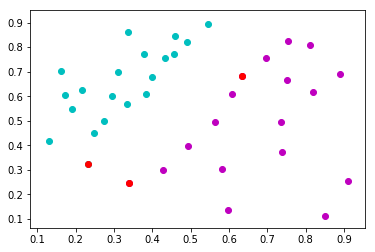

[[2.34891034e-07]
 [2.22281417e-07]
 [2.59393401e-07]
 [3.64772487e-07]
 [3.22699352e-07]
 [9.46226622e-08]
 [9.99999960e+01]
 [2.79333019e-07]
 [7.59846827e-07]
 [1.83238692e-07]
 [2.21200878e-07]
 [5.25512843e-08]
 [8.28888466e-08]
 [6.44046032e-08]
 [5.66388582e-08]
 [4.16789941e-08]
 [9.28679719e-08]
 [1.18807356e-07]
 [1.30063318e-07]
 [7.63536526e-08]
 [9.91437687e+01]
 [2.67241691e-07]
 [2.47966901e-07]
 [2.17481727e-07]
 [5.96803559e-07]
 [8.56227129e-01]
 [1.11465357e-06]
 [8.06542373e-07]
 [1.45916211e-07]
 [5.51483833e-08]
 [3.93589394e-08]
 [5.89711843e-08]
 [3.65372904e-08]
 [2.04475588e-08]
 [2.18540429e-08]
 [5.38910211e-08]
 [5.05022551e-08]
 [1.00274804e-07]]


In [8]:
a,sv,w,b,classification = svmlin(lc_train_data,lc_train_label,100)
plt.scatter(lc_train_data[lc_train_label.flatten()==1,0], lc_train_data[lc_train_label.flatten()==1,1], c = 'c')
plt.scatter(lc_train_data[lc_train_label.flatten()==-1,0], lc_train_data[lc_train_label.flatten()==-1,1], c = 'm')
plt.scatter(sv[:,0],sv[:,1],c = 'r')
plt.show()
print(a)



# <center>Classifying test data using Weights calculated above</center>

[[  1.42357098]
 [  0.33761199]
 [ -0.46367057]
 [  3.03510829]
 [  0.96896973]
 [  0.21343496]
 [  2.59546773]
 [  3.77004808]
 [ -0.28070572]
 [ -1.61348107]
 [ -2.16076222]
 [ -2.8265784 ]
 [ -2.94531337]
 [ -3.57901723]
 [ -3.84333262]
 [ -3.28720536]
 [ -3.22698231]
 [ -3.17812943]
 [ -2.76525314]
 [ -1.16206289]
 [ -0.87961675]
 [ -1.41490356]
 [ -1.57209356]
 [ -8.10567319]
 [-15.39150371]
 [-28.08209059]
 [-30.23453509]
 [-14.58558803]
 [-10.24024607]
 [-15.49707056]
 [ -5.11344448]
 [ -9.68159286]
 [  9.48744136]
 [  5.49493341]
 [ 10.10062733]
 [  3.85835791]
 [  2.23847211]]


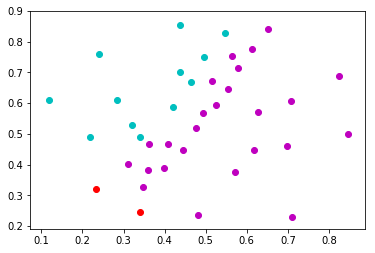

0.9459459459459459

In [7]:
test_classification = np.matmul(polynomial_kernel(lc_test_data,lc_train_data,degree=18),(lc_train_label*a)) + b
print(test_classification)
for i in range(test_classification.shape[0]):
    if(test_classification[i]>0):
        test_classification[i] = 1
    elif(test_classification[i]<0):
        test_classification[i] = -1
plt.scatter(lc_test_data[test_classification.flatten()==1,0], lc_test_data[test_classification.flatten()==1,1], c = 'c')
plt.scatter(lc_test_data[test_classification.flatten()==-1,0], lc_test_data[test_classification.flatten()==-1,1], c = 'm')
plt.scatter(sv[:,0],sv[:,1],c = 'r')
plt.show()
accuracy_score(lc_test_label,test_classification)

# <center>Loading digits</center>

In [8]:
digit_3_train = np.array(pd.read_csv('digit_3_train.dat',sep=",",header=None))
digit_3_test = np.array(pd.read_csv('digit_3_test.dat',sep=",",header=None))
digit_1_train = np.array(pd.read_csv('digit_1_train.dat',sep=",",header=None))
digit_1_test = np.array(pd.read_csv('digit_1_test.dat',sep=",",header=None))
digit_8_train = np.array(pd.read_csv('digit_8_train.dat',sep=",",header=None))
digit_8_test = np.array(pd.read_csv('digit_8_test.dat',sep=",",header=None))

# <center>Create training vectors for digit 1 and digit 3</center>

In [9]:
X_ = np.vstack((digit_1_train,digit_3_train))
y_pos = np.ones((digit_1_train.shape[0],1))
y_neg = -1*np.ones((digit_3_train.shape[0],1))
y_ = np.vstack((y_pos,y_neg))

# <center>Train classifier using Linear kernel</center>

In [10]:
a,sv,w,b,classification = svmlin(X_,y_,100)

     pcost       dcost       gap    pres   dres
 0:  9.6626e+02 -3.4122e+06  8e+06  3e-01  6e-11
 1:  1.8803e+03 -5.9938e+05  1e+06  4e-02  4e-11
 2:  7.5416e+02 -5.4122e+04  1e+05  3e-03  9e-12
 3:  3.2999e+02 -4.4814e+03  8e+03  2e-04  2e-12
 4:  1.7007e+02 -2.1936e+02  4e+02  2e-06  3e-13
 5:  2.5356e+01 -2.9647e+01  6e+01  2e-15  2e-13
 6:  3.3807e+00 -4.5403e+00  8e+00  1e-15  9e-14
 7:  3.6667e-01 -7.5647e-01  1e+00  2e-16  3e-14
 8:  7.3263e-02 -3.5493e-01  4e-01  2e-16  1e-14
 9:  1.5612e-02 -3.7975e-01  4e-01  2e-16  1e-14
10: -7.4608e-02 -2.4509e-01  2e-01  2e-16  9e-15
11: -1.0827e-01 -2.3325e-01  1e-01  2e-16  9e-15
12: -1.2927e-01 -2.0542e-01  8e-02  2e-16  9e-15
13: -1.4720e-01 -1.8182e-01  3e-02  6e-16  1e-14
14: -1.5989e-01 -1.6475e-01  5e-03  5e-16  1e-14
15: -1.6207e-01 -1.6218e-01  1e-04  2e-16  1e-14
16: -1.6212e-01 -1.6212e-01  2e-06  2e-16  1e-14
17: -1.6212e-01 -1.6212e-01  2e-08  2e-16  1e-14
Optimal solution found.


#  <center>Testing Classifier</center>

In [11]:
test_classifications_3 = np.matmul(digit_3_test, w.transpose()) + b
test_classifications_1 = np.matmul(digit_1_test, w.transpose()) + b
test_hypo = np.vstack((test_classifications_1,test_classifications_3))

for i in range(test_hypo.shape[0]):
    if(test_hypo[i]>0):
        test_hypo[i] = 1
    elif(test_hypo[i]<0):
        test_hypo[i] = -1
test_labels_pos = np.ones((digit_1_test.shape[0],1))
test_labels_neg = -np.ones((digit_3_test.shape[0],1))
test_labels = np.vstack((test_labels_pos,test_labels_neg))



# <center>Checking accuracy</center>

In [12]:
accuracy_score(test_labels,test_hypo)

0.9906976744186047

#  <center>Creating training vectors for digit 3 and 8</center>

In [13]:
X_2 = np.vstack((digit_3_train,digit_8_train))
y_pos_2 = np.ones((digit_3_train.shape[0],1))
y_neg_2 = -1*np.ones((digit_8_train.shape[0],1))
y_2 = np.vstack((y_pos_2,y_neg_2))

# <center>Training the classifier on Linear kernel</center>

In [14]:
a_2,sv_2,w_2,b_2,classification_2 = svmlin(X_2,y_2,100)

     pcost       dcost       gap    pres   dres
 0:  8.7823e+02 -6.0814e+06  2e+07  6e-01  1e-10
 1:  9.2657e+03 -1.9534e+06  4e+06  1e-01  9e-11
 2:  7.8839e+03 -5.5149e+05  1e+06  3e-02  5e-11
 3:  4.1884e+03 -7.7320e+04  1e+05  3e-03  2e-11
 4:  2.0043e+03 -8.1151e+03  1e+04  3e-04  3e-12
 5:  4.8765e+02 -6.0987e+02  1e+03  3e-06  1e-12
 6:  6.6701e+01 -8.7853e+01  2e+02  2e-14  5e-13
 7:  7.3402e+00 -1.4603e+01  2e+01  8e-15  2e-13
 8:  8.4292e-02 -4.3176e+00  4e+00  8e-15  9e-14
 9: -1.1231e+00 -4.1148e+00  3e+00  2e-15  7e-14
10: -1.8138e+00 -3.3744e+00  2e+00  2e-15  8e-14
11: -2.1292e+00 -2.7122e+00  6e-01  9e-16  8e-14
12: -2.2981e+00 -2.4088e+00  1e-01  5e-15  9e-14
13: -2.3392e+00 -2.3447e+00  6e-03  4e-15  9e-14
14: -2.3415e+00 -2.3416e+00  1e-04  2e-16  9e-14
15: -2.3415e+00 -2.3415e+00  3e-06  2e-15  9e-14
16: -2.3415e+00 -2.3415e+00  5e-08  4e-16  1e-13
Optimal solution found.


#  <center>Testing classifier</center>

In [82]:
test_classifications_3_2 = np.matmul(digit_3_test, w_2.transpose()) + b_2
test_classifications_8_2 = np.matmul(digit_8_test, w_2.transpose()) + b_2
test_hypo_2 = np.vstack((test_classifications_3_2,test_classifications_8_2))

for i in range(test_hypo_2.shape[0]):
    if(test_hypo_2[i]>0):
        test_hypo_2[i] = 1
    elif(test_hypo_2[i]<0):
        test_hypo_2[i] = -1
test_labels_pos_2 = np.ones((digit_3_test.shape[0],1))
test_labels_neg_2 = -np.ones((digit_8_test.shape[0],1))
test_labels_2 = np.vstack((test_labels_pos_2,test_labels_neg_2))

accuracy_score(test_labels_2,test_hypo_2)

0.963855421686747

# <center>Training the same classifier using polynomial kernel</center>

In [83]:
a_3,sv_3,w_3,b_3,classification_3 = svmnonlin_pol(X_2,y_2,100,10)

     pcost       dcost       gap    pres   dres
 0:  3.2407e+03 -1.7501e+05  3e+05  2e-02  4e-13
 1:  1.8047e+03 -1.9564e+04  4e+04  2e-03  3e-13
 2:  6.9176e+02 -3.0673e+03  5e+03  2e-04  2e-13
 3:  1.9156e+02 -2.2982e+02  4e+02  2e-06  1e-13
 4:  2.6709e+01 -3.3948e+01  6e+01  2e-16  1e-13
 5:  3.2218e+00 -5.4499e+00  9e+00  7e-16  4e-14
 6:  1.5521e-01 -1.0526e+00  1e+00  8e-16  2e-14
 7: -1.8794e-01 -3.4160e-01  2e-01  2e-16  6e-15
 8: -2.2460e-01 -2.7757e-01  5e-02  2e-16  3e-15
 9: -2.3776e-01 -2.5716e-01  2e-02  2e-16  3e-15
10: -2.4374e-01 -2.4896e-01  5e-03  2e-16  3e-15
11: -2.4526e-01 -2.4582e-01  6e-04  3e-16  3e-15
12: -2.4545e-01 -2.4547e-01  2e-05  2e-16  3e-15
13: -2.4546e-01 -2.4546e-01  4e-07  2e-16  3e-15
14: -2.4546e-01 -2.4546e-01  9e-09  5e-16  3e-15
Optimal solution found.
(1200, 1)


In [92]:
test_3 = np.vstack((digit_3_test,digit_8_test))

test_hypo_3 = np.matmul(polynomial_kernel(test_3,X_2,degree=10),(y_2*a_3)) + b_3
for i in range(test_hypo_3.shape[0]):
    if(test_hypo_3[i]>0):
        test_hypo_3[i] = 1
    elif(test_hypo_3[i]<0):
        test_hypo_3[i] = -1
test_labels_pos_3 = np.ones((digit_3_test.shape[0],1))
test_labels_neg_3 = -np.ones((digit_8_test.shape[0],1))
test_labels_3 = np.vstack((test_labels_pos_3,test_labels_neg_3))
accuracy_score(test_labels_3,test_hypo_3)

0.9759036144578314

As evident above the accuracy of the classifier has increased from 96.38% to 97.59% just by changing the kernel(Linear to Polynomial). One of the reason it could happen is that the given data is not linearly separable.

# <center>It can be seen below with a few examples that support vectors are hard to classify</center>

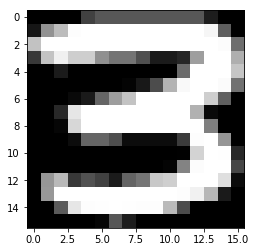

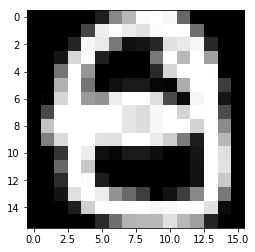

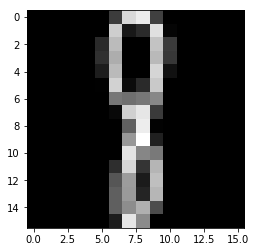

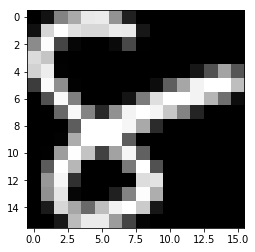

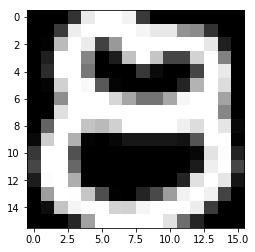

In [93]:
support_vectors = sv_3.reshape(-1,16,16)
samples = np.random.choice(support_vectors.shape[0],5)

for i in range(samples.shape[0]):
    plt.imshow(support_vectors[samples[i]], cmap='gray')
    plt.show()

# <center>Digits which are easier to classify(which are not support vectors)</center>

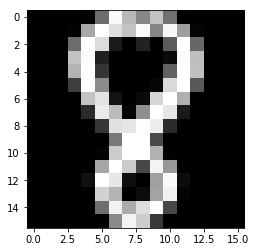

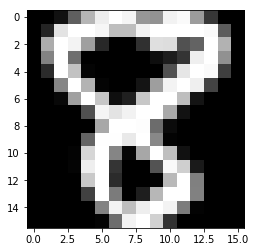

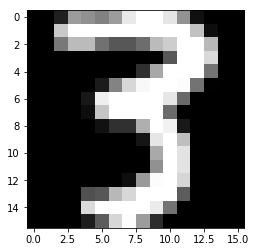

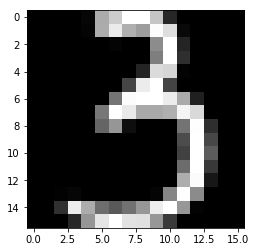

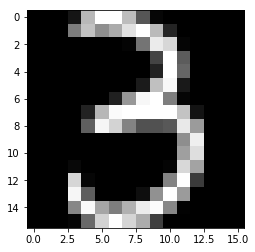

In [86]:
temp = X_3[a_3.flatten()<10e-4,:]
temp = temp.reshape(-1,16,16)

samples = np.random.choice(temp.shape[0],5)


for i in range(samples.shape[0]):
    plt.imshow(temp[samples[i]], cmap='gray')
    plt.show()

In [97]:
print(support_vectors.shape)

(175, 16, 16)
